### ACT - CLIMATE CHANGE BELIEF ( TEAM NM4 )

### Loading The Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import sklearn
# Function to deal with missing values via imputation
from sklearn.impute import SimpleImputer
# Function that converts categorical values into numerical values via ordinal encoding or one-hot encoding
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
# Function to split data into different groups
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import *
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier
import random
import math
import string
import re
import html

# Statistics functions
from scipy.stats import norm
from scipy import stats
from scipy.stats import randint
from scipy.stats import chi2_contingency

# sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import *
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
import scipy.sparse as sp
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

# nltk
import nltk
from nltk.corpus import stopwords
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.util import ngrams

In [2]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\Data
[nltk_data]     Science\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Data
[nltk_data]     Science\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
df = pd.read_csv('train.csv') # Loading the train data
df.head() # First 5 columns of the train data

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [20]:
td = pd.read_csv('test_with_no_labels.csv') # Loading the test data
td.head() # First 5 columns of the test data

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [21]:
td1 = td.copy()
td1.shape

(10546, 2)

In [23]:
df3 = df.copy()

### General Exploratory Data Analysis

In [22]:
# Information of the train data set, to check for nulls
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [7]:
# Information of the test data set, to check for nulls
td.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


In [8]:
df.describe().T # Summary statistics for the train data set; the five number summary

,count,mean,std,min,25%,50%,75%,max
sentiment,15819.0,0.917504,0.836537,-1.0,1.0,1.0,1.0,2.0
tweetid,15819.0,501719.433656,289045.983132,6.0,253207.5,502291.0,753769.0,999888.0


In [9]:
td.describe().T # Summary statistics for the test data set; the five number summary 

,count,mean,std,min,25%,50%,75%,max
tweetid,10546.0,496899.936943,288115.677148,231.0,246162.5,495923.0,742250.0,999983.0


In [10]:
# a table that shows the sentiment types and the total number of tweets allocated to them
class_df = df.groupby('sentiment').count()['message'].reset_index().sort_values(by='message',ascending=False)
class_df.style.background_gradient(cmap='winter')

,sentiment,message
2,1,8530
3,2,3640
1,0,2353
0,-1,1296


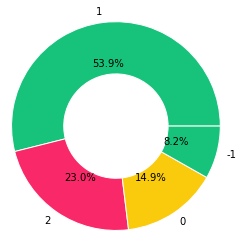

In [11]:
# A donut chart that shows the total percentage of tweet for each sentiment group
percent_class=class_df.message
labels= class_df.sentiment

colors = ['#17C37B','#F92969','#FACA0C']

my_pie,_,_ = plt.pie(percent_class,radius = 1.2,labels=labels,colors=colors,autopct="%.1f%%")

plt.setp(my_pie, width=0.6, edgecolor='white') 

plt.show()

<AxesSubplot:xlabel='sentiment', ylabel='count'>

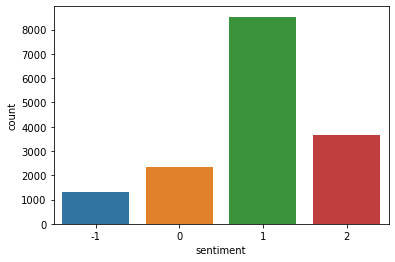

In [12]:
# A count plot that displays the total number of tweets per sentiment
sns.countplot(x = 'sentiment', data = df)

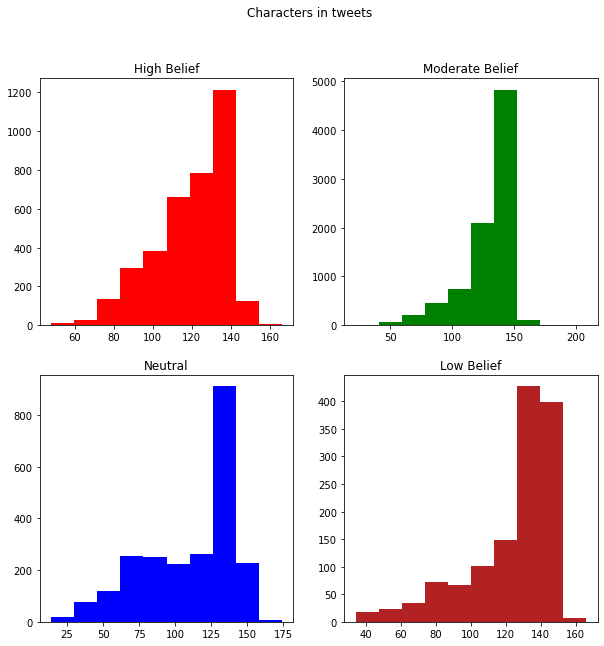

In [13]:
# Here we plot histograms to display the total number of characters in a tweet per sentiment
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(10,10))
tweet_len=df[df['sentiment']==2]['message'].str.len()
ax1.hist(tweet_len,color='red')
ax1.set_title('High Belief')
tweet_len=df[df['sentiment']==1]['message'].str.len()
ax2.hist(tweet_len,color='green')
ax2.set_title('Moderate Belief')
tweet_len=df[df['sentiment']==0]['message'].str.len()
ax3.hist(tweet_len,color='blue')
ax3.set_title('Neutral')
tweet_len=df[df['sentiment']==-1]['message'].str.len()
ax4.hist(tweet_len,color='firebrick')
ax4.set_title('Low Belief')
fig.suptitle('Characters in tweets')
plt.show()

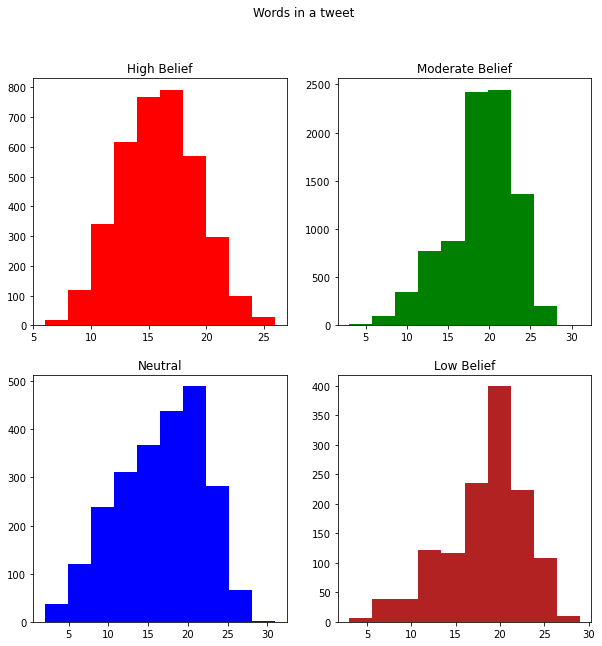

In [14]:
# Here we plot the total number of words in a tweet per sentiment
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(10,10))
tweet_len=df[df['sentiment']==2]['message'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='red')
ax1.set_title('High Belief')
tweet_len=df[df['sentiment']==1]['message'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='green')
ax2.set_title('Moderate Belief')
tweet_len=df[df['sentiment']==0]['message'].str.split().map(lambda x: len(x))
ax3.hist(tweet_len,color='blue')
ax3.set_title('Neutral')
tweet_len=df[df['sentiment']==-1]['message'].str.split().map(lambda x: len(x))
ax4.hist(tweet_len,color='firebrick')
ax4.set_title('Low Belief')
fig.suptitle('Words in a tweet')
plt.show()

Text(0.5, 0.98, 'Average word length in each tweet')

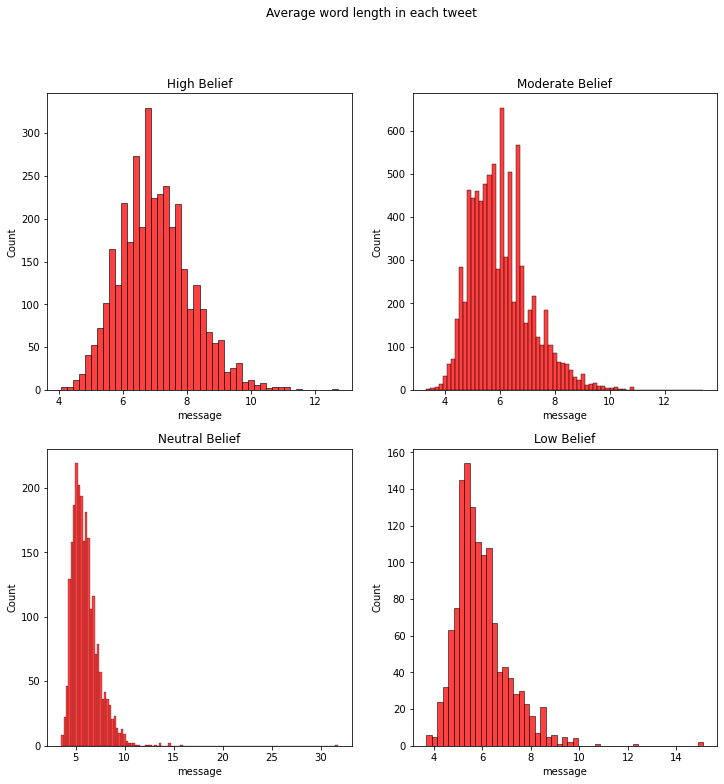

In [256]:
# Here we print the average tweet lenght per sentiment
fig,((ax1,ax2), (ax3,ax4))=plt.subplots(2,2,figsize=(12,12))
word=df[df['sentiment']==2]['message'].str.split().apply(lambda x : [len(i) for i in x])
sns.histplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('High Belief')
word=df[df['sentiment']==1]['message'].str.split().apply(lambda x : [len(i) for i in x])
sns.histplot(word.map(lambda x: np.mean(x)),ax=ax2,color='red')
ax2.set_title('Moderate Belief')
word=df[df['sentiment']==0]['message'].str.split().apply(lambda x : [len(i) for i in x])
sns.histplot(word.map(lambda x: np.mean(x)),ax=ax3,color='red')
ax3.set_title('Neutral Belief')
word=df[df['sentiment']==-1]['message'].str.split().apply(lambda x : [len(i) for i in x])
sns.histplot(word.map(lambda x: np.mean(x)),ax=ax4,color='red')
ax4.set_title('Low Belief')
fig.suptitle('Average word length in each tweet')

### PRE PROCESSING ON BOTH THE TRAIN AND TEST DATA

#### Removing Noise From Data Sets (Punctuations, Stopwords, Tokenization and Lemmatization)

In [24]:
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
tokeniser = TreebankWordTokenizer()
stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()


In [25]:
def lemma(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words]

#### Pre-processing on the Train data

In [26]:
#This is the pre-processing conducted on the train data
for i in range (len(df['message'])):
    df['message'][i]=df['message'][i].replace('\n', '')
    df['message'][i]=html.unescape(df['message'][i])

for i in range (len(df['message'])):
    df['message'][i]=re.sub(r"(@[A-Za-z0-9_]+)|[^\w\s]|http\S+","",df['message'][i])

df['message']=df['message'].str.lower()
tokeniser = TreebankWordTokenizer()
df['tweet tokens'] = df['message'] .apply(tokeniser.tokenize)

df.drop(['message'], axis=1, inplace=True)
df['tweet tokens'] = df['tweet tokens'].apply(lemma, args=(lemmatizer, ))

for i in df['tweet tokens']:
    i=[word for word in i if not word in stopwords.words('english') and word != 'not']
text = df['tweet tokens'].map(' '.join)
cv = CountVectorizer().fit(text)
cn=cv.get_feature_names()
df3=cv.transform(text).toarray()
df3=pd.DataFrame((df3),columns=cn)

C:\Users\DATASC~1\AppData\Local\Temp/ipykernel_7000/3349320948.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['message'][i]=df['message'][i].replace('\n', '')
C:\Users\DATASC~1\AppData\Local\Temp/ipykernel_7000/3349320948.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['message'][i]=html.unescape(df['message'][i])
C:\Users\DATASC~1\AppData\Local\Temp/ipykernel_7000/3349320948.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

Since only the `message` column in the train data was cleaned, we join the `sentiment` column and ignore the `tweetid` as it is irrelevant to our predictions

In [27]:
df3['sentiment'] = df['sentiment']

#### Pre-processiing on The Test Data

In [28]:
#This is the pre-processing conducted on the train data
for i in range (len(td['message'])):
    td['message'][i]=td['message'][i].replace('\n', '')
    td['message'][i]=html.unescape(td['message'][i])

for i in range (len(td['message'])):
    td['message'][i]=re.sub(r"(@[A-Za-z0-9_]+)|[^\w\s]|http\S+","",td['message'][i])

td['message']=td['message'].str.lower()
tokeniser = TreebankWordTokenizer()
td['tweet tokens'] = td['message'] .apply(tokeniser.tokenize)

td.drop(['message'], axis=1, inplace=True)
td['tweet tokens'] = td['tweet tokens'].apply(lemma, args=(lemmatizer, ))

for i in td['tweet tokens']:
    i=[word for word in i if not word in stopwords.words('english') and word != 'not']
text2 = td['tweet tokens'].map(' '.join)
cv = CountVectorizer().fit(text2)
cn2=cv.get_feature_names()
td=cv.transform(text2).toarray()
td=pd.DataFrame((td),columns=cn2)

C:\Users\DATASC~1\AppData\Local\Temp/ipykernel_7000/639573347.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  td['message'][i]=td['message'][i].replace('\n', '')
C:\Users\DATASC~1\AppData\Local\Temp/ipykernel_7000/639573347.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  td['message'][i]=html.unescape(td['message'][i])
C:\Users\DATASC~1\AppData\Local\Temp/ipykernel_7000/639573347.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

In [29]:
# now let us make the test data consistent with the train data. (make the features similar)
td4=[]
for word in cn:
    if word in cn2:
        td4.append(td[word])
    else:
        td4.append(pd.DataFrame(0 for i in range(td.shape[0])))
td4=pd.concat(td4, axis=1)
td4.head()

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
td4.shape

(10546, 16535)

### Splitting The Train Data Into Test and Train Splits

First we split the train data into the dependent and independent variables

In [31]:
y = df3[:len(df3)][['sentiment']] # dependent variable
X = df3[:len(df3)].drop('sentiment', axis = 1) # independent variables(our predictive variables)

In [32]:
X.shape

(15819, 16535)

In [33]:
y.shape

(15819, 1)

Next we try to select the best features from our independent variables using the `SelectKbest` with Score _funtion = chi2, then we fit it into our train data and then transform it to get our best features.

In [34]:
kbest=SelectKBest(chi2,k=1000)

In [35]:
X_new = kbest.fit_transform(X,y)

Next we scales the newly selected features and then transform them

In [36]:
scaler = StandardScaler()

# create scaled version of the predictors (there is no need to scale the response)
X_scaled = scaler.fit_transform(X_new)

We then split our train data into test and train splits using the scaled values for the newly selected features.

In [37]:
X_train, X_test, y_train, y_test = tts(X_scaled, y, test_size = 0.2, random_state=42)

Now we do the same feature best selection and scaling on the test data.

In [38]:
testd = kbest.transform(td4)

In [39]:
testd = scaler.transform(testd)

### Logistic Regression

In [40]:
log_reg = LogisticRegression()  # classification algorith

In [41]:
# fitting the pipeline
log_reg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
predictions_lr = log_reg.predict(X_test)
predictions_lr

array([1, 2, 1, ..., 1, 1, 2], dtype=int64)

In [43]:
def metrics(y_true,y_pred):
    print(classification_report(y_true,y_pred))
    print("\n")
    print(confusion_matrix(y_true,y_pred))

In [44]:
metrics(y_test,predictions_lr)

              precision    recall  f1-score   support

          -1       0.63      0.48      0.55       278
           0       0.50      0.45      0.48       425
           1       0.78      0.83      0.80      1755
           2       0.75      0.72      0.73       706

    accuracy                           0.73      3164
   macro avg       0.66      0.62      0.64      3164
weighted avg       0.72      0.73      0.72      3164



[[ 134   50   82   12]
 [  28  192  177   28]
 [  42  117 1462  134]
 [   9   23  164  510]]


In [45]:
prediction = log_reg.predict(testd)

### For Submission

In [46]:
daf = pd.DataFrame(prediction, columns = ['sentiment'])
daf.head()

,sentiment
0,1
1,1
2,1
3,1
4,0


In [47]:
output = pd.DataFrame({'tweetid':td1['tweetid']})
submission = output.join(daf)
submission.to_csv('submission.csv', index = False)

In [48]:
submission.head()

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,0


In [49]:
submission.shape

(10546, 2)